# DESAFIO 3 - MACHINE LEARNING - DATA SCIENCE - DESAFIO LATAM

In [116]:
# Importamos librerías necesarias
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency, ks_2samp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Ignorar warnings
warnings.filterwarnings('ignore')

In [117]:
# Define la ruta del archivo
ruta_archivo = "data/Telco-Customer-Churn.xlsx"

# Cargar el archivo en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
# Revisamos las columnas y realizamos una definición de cada una
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### DETALLE DATOS

| **Nombre Original**       | **Traducción al Español**            |
|----------------------------|---------------------------------------|
| customerID                | Identificación del cliente           |
| gender                    | Género                               |
| SeniorCitizen             | Ciudadano mayor (Senior Citizen)     |
| Partner                   | Pareja                               |
| Dependents                | Dependientes                        |
| tenure                    | Permanencia (tenure)                |
| PhoneService              | Servicio de teléfono                |
| MultipleLines             | Líneas múltiples                    |
| InternetService           | Servicio de internet                |
| OnlineSecurity            | Seguridad en línea                  |
| OnlineBackup              | Copia de seguridad en línea         |
| DeviceProtection          | Protección del dispositivo          |
| TechSupport               | Soporte técnico                     |
| StreamingTV               | Streaming de TV                     |
| StreamingMovies           | Streaming de películas              |
| Contract                  | Contrato                            |
| PaperlessBilling          | Facturación sin papel               |
| PaymentMethod             | Método de pago                      |
| MonthlyCharges            | Cargos mensuales                    |
| TotalCharges              | Cargos totales                      |
| Churn                     | Deserción (Churn)                   |


In [119]:
# Describimos los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [120]:
# Obtenemos información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
# Vemos datos nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [134]:
# Realizamos una función de análisis de datos
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes'])
    
    # Obtener información general del dataframe
    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]
    
    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values
    
    return result_df

# Uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result)


                 Tipo de dato  Valores únicos  Valores faltantes
Columna                                                         
customerID             object            7043                  0
gender                 object               2                  0
SeniorCitizen           int64               2                  0
Partner                object               2                  0
Dependents             object               2                  0
tenure                  int64              73                  0
PhoneService           object               2                  0
MultipleLines          object               3                  0
InternetService        object               3                  0
OnlineSecurity         object               3                  0
OnlineBackup           object               3                  0
DeviceProtection       object               3                  0
TechSupport            object               3                  0
StreamingTV            ob

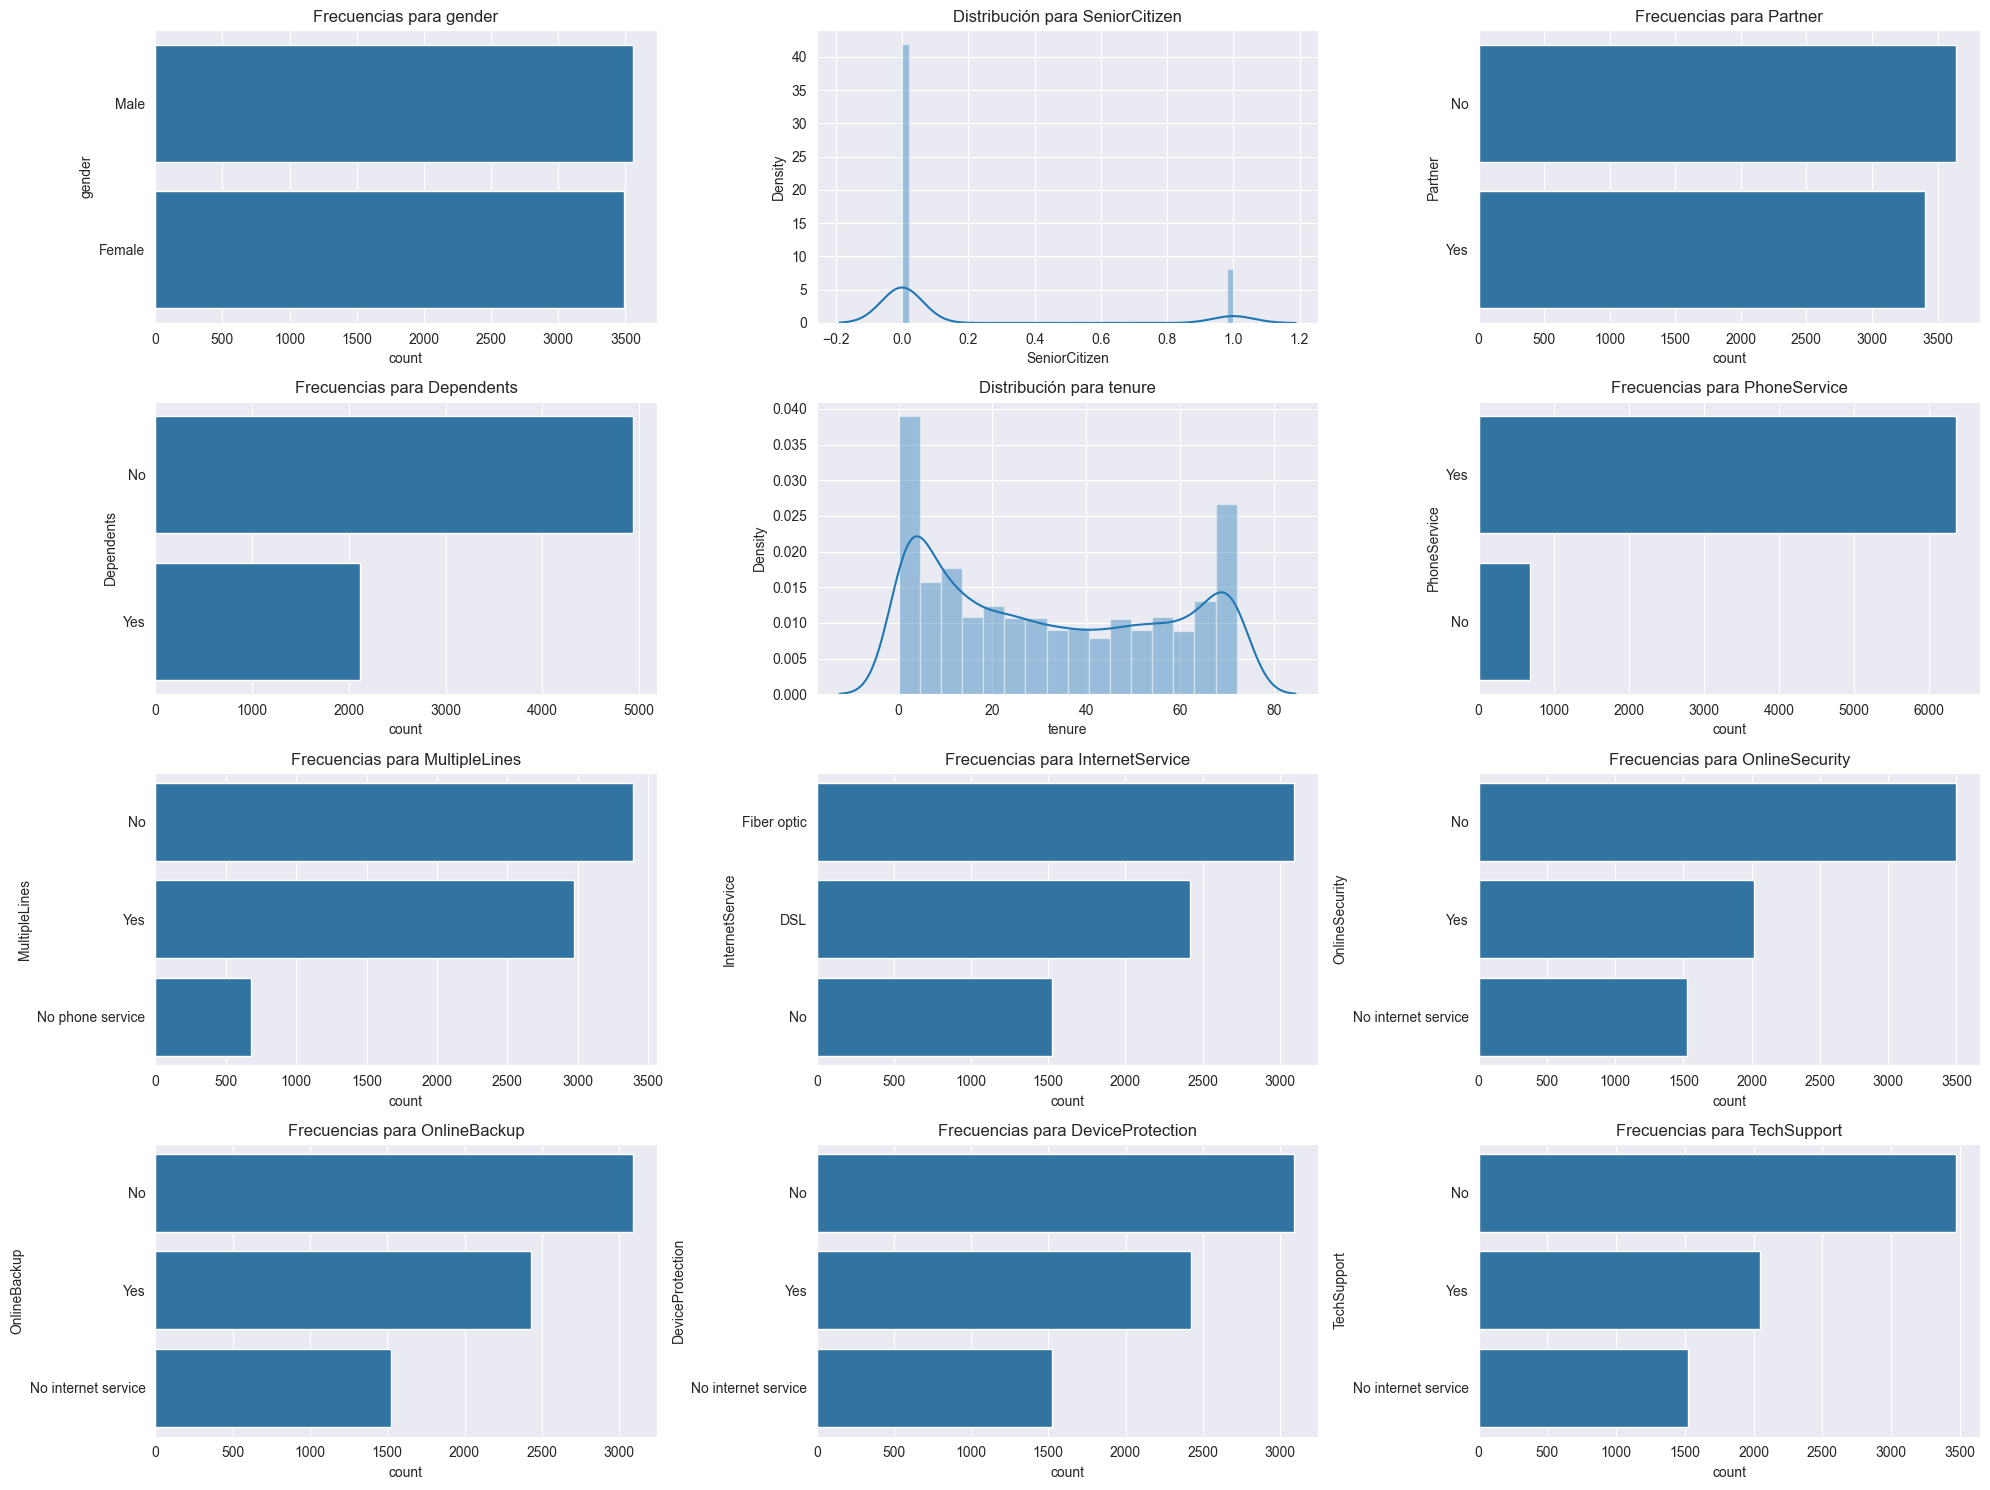

In [123]:
plt.figure(figsize=(20, 15))
for n, i in enumerate(analysis_result.index.to_list()[1:][:12]):
    plt.subplot(4, 3, n + 1)
    if analysis_result.loc[i, 'Tipo de dato'] == 'object':
        sns.countplot(y=df[i], order=df[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
        plt.tight_layout()


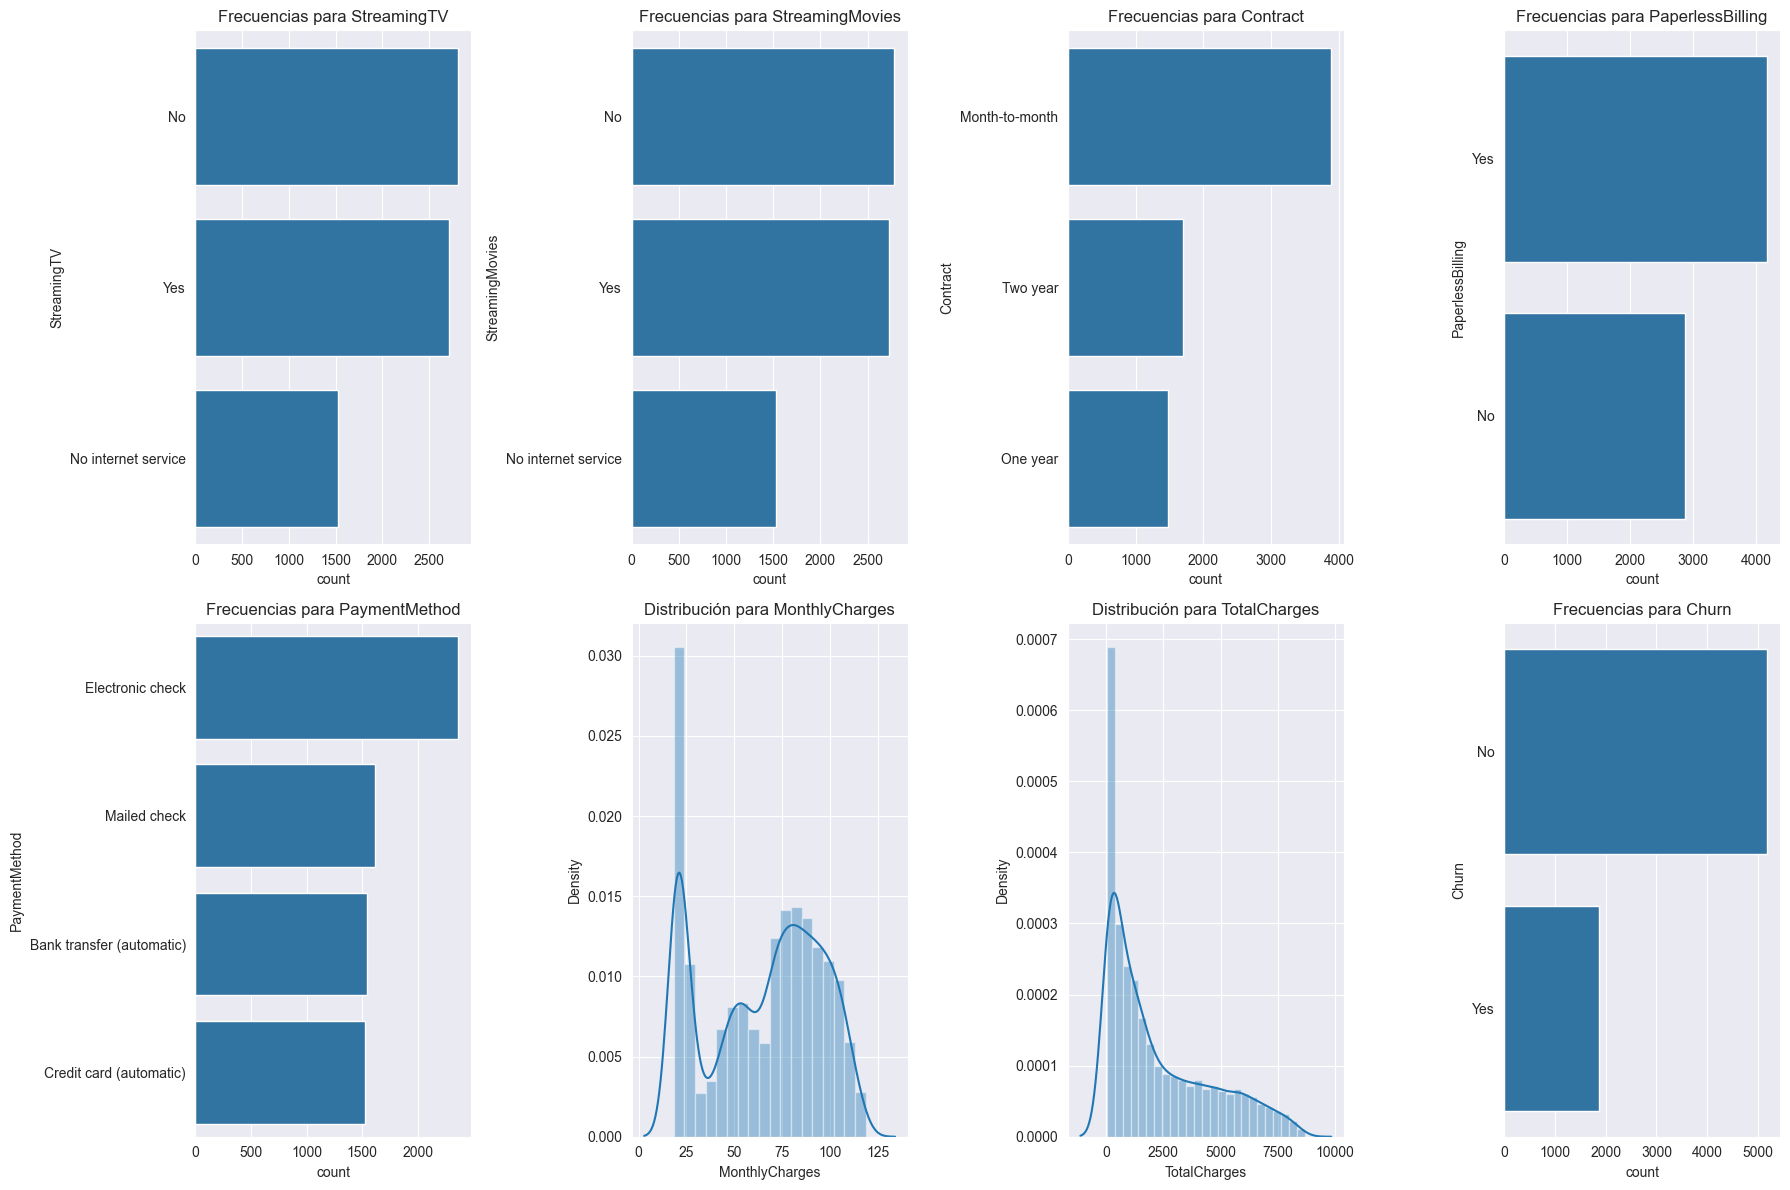

In [124]:
plt.figure(figsize=(18, 12))
for n, i in enumerate(analysis_result.index.to_list()[1:][12:]):
    plt.subplot(2, 4, n + 1)
    if analysis_result.loc[i, 'Tipo de dato'] == 'object':
        sns.countplot(y=df[i], order=df[i].value_counts().index)
        plt.title('Frecuencias para {}'.format(i))
        plt.tight_layout()
    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
        plt.tight_layout()


# CORRELACION CHI-CUADRADO ENTRE VARIABLES CATEGORICAS Y CHURN

In [125]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[feature], df['Churn']))
    print(f"Chi-cuadrado entre {feature}: y Churn {chi2:.2f}, p-value: {p:.4f}")

Chi-cuadrado entre customerID: y Churn 7043.00, p-value: 0.4944
Chi-cuadrado entre gender: y Churn 0.48, p-value: 0.4866
Chi-cuadrado entre Partner: y Churn 158.73, p-value: 0.0000
Chi-cuadrado entre Dependents: y Churn 189.13, p-value: 0.0000
Chi-cuadrado entre PhoneService: y Churn 0.92, p-value: 0.3388
Chi-cuadrado entre MultipleLines: y Churn 11.33, p-value: 0.0035
Chi-cuadrado entre InternetService: y Churn 732.31, p-value: 0.0000
Chi-cuadrado entre OnlineSecurity: y Churn 850.00, p-value: 0.0000
Chi-cuadrado entre OnlineBackup: y Churn 601.81, p-value: 0.0000
Chi-cuadrado entre DeviceProtection: y Churn 558.42, p-value: 0.0000
Chi-cuadrado entre TechSupport: y Churn 828.20, p-value: 0.0000
Chi-cuadrado entre StreamingTV: y Churn 374.20, p-value: 0.0000
Chi-cuadrado entre StreamingMovies: y Churn 375.66, p-value: 0.0000
Chi-cuadrado entre Contract: y Churn 1184.60, p-value: 0.0000
Chi-cuadrado entre PaperlessBilling: y Churn 258.28, p-value: 0.0000
Chi-cuadrado entre PaymentMethod

# CORRELACION DE PEARSON ENTRE VARIABLES NUMERICAS Y CHURN

In [126]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_features:
    dfi = df.loc[:, [feature, 'Churn']].dropna()
    corr, _ = pearsonr(dfi[feature], dfi['Churn'].replace({'No': 0, 'Yes': 1}))
    print(f"Pearson correlativo entre {feature} y Churn: {corr:.2f}")

Pearson correlativo entre SeniorCitizen y Churn: 0.15
Pearson correlativo entre tenure y Churn: -0.35
Pearson correlativo entre MonthlyCharges y Churn: 0.19
Pearson correlativo entre TotalCharges y Churn: -0.20


# TRANSFORMACION Y DIVISION DEL DATASET

In [127]:
# Eliminar columnas no relevantes para el análisis
df_final = df.drop(['customerID'], axis=1).dropna()

# Codificar variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features[1:]:
    df_final[feature] = label_encoder.fit_transform(df_final[feature])
    
# Separar las variables predictoras y la variable objetivo
X = df_final.drop(['Churn'], axis=1)
y = df_final['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables numéricas para que tenga media 0 y desviación estándar 1
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ENTRENAMIENTO DE MODELO

In [128]:
# Definir los hiperparámetros para el módelo KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

# Crear y entrenar el módelo KNN con GridSearchCV
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Obtener el mejor módelo KNN con los mejores hiperparámetros
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluar el rendimiento del modelo KNN con los mejores hiperparámetros
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(grid_search_knn.best_params_)
print(f"Precisión del módelo KNN con los mejores hiperparámetros: {accuracy_knn}")


{'metric': 'manhattan', 'n_neighbors': 9}
Precisión del módelo KNN con los mejores hiperparámetros: 0.7455579246624022


In [129]:
# Definir los valores de hiperparámetros para el modelo de árbol de decisión
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Crear y entrenar el modelo de árbol de decisión con GridSearchCV
tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Obtener el mejor módelo de árbol de decisión con los mejores hiperparámetros
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Evaluar el rendimiento del modelo de árbol de decisión con los mejores hiperparámetros
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(grid_search_tree.best_params_)
print(f"Precisión del modelo de árbol con los mejores hiperparámetros: {accuracy_tree}")

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión del modelo de árbol con los mejores hiperparámetros: 0.7882018479033405


In [130]:
# Entrenar el modelo de Naive Bayes
# Definir el modelo Naive Bayes
model = GaussianNB()

# Definir los parámetros para GridSearchCV
param_grid_naive_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Crear y entrenar el modelo con GridSearchCV
grid_search_naive_bayes = GridSearchCV(estimator=model, param_grid=param_grid_naive_bayes, cv=5, n_jobs=-1)
grid_search_naive_bayes.fit(X_train, y_train)

# Obtener el mejor modelo de Naive Bayes con los mejores hiperparámetros
best_naive_bayes = grid_search_naive_bayes.best_estimator_

# Realizar las predicciones
y_pred_naive_bayes = best_naive_bayes.predict(X_test)

# Evaluar el rendimiento del modelo de Naive Bayes con los mejores hiperparámetros
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Mejores hiperparámetros: {grid_search_naive_bayes.best_params_}")
print(f"Precisión del modelo Naive Bayes con los mejores hiperparámetros: {accuracy_naive_bayes}")

# Mostrar la matriz de confusión
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print("Matriz de confusión de Naive Bayes:")
print(cm_naive_bayes)

# Mostrar el reporte de clasificación
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print("Reporte de clasificación de Naive Bayes:")
print(report_naive_bayes)


Mejores hiperparámetros: {'var_smoothing': 1e-09}
Precisión del modelo Naive Bayes con los mejores hiperparámetros: 0.7377398720682303
Matriz de confusión de Naive Bayes:
[[766 267]
 [102 272]]
Reporte de clasificación de Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



# EVALUACION DEL MEJOR MODELO

Accurracy del modelo: 0.75


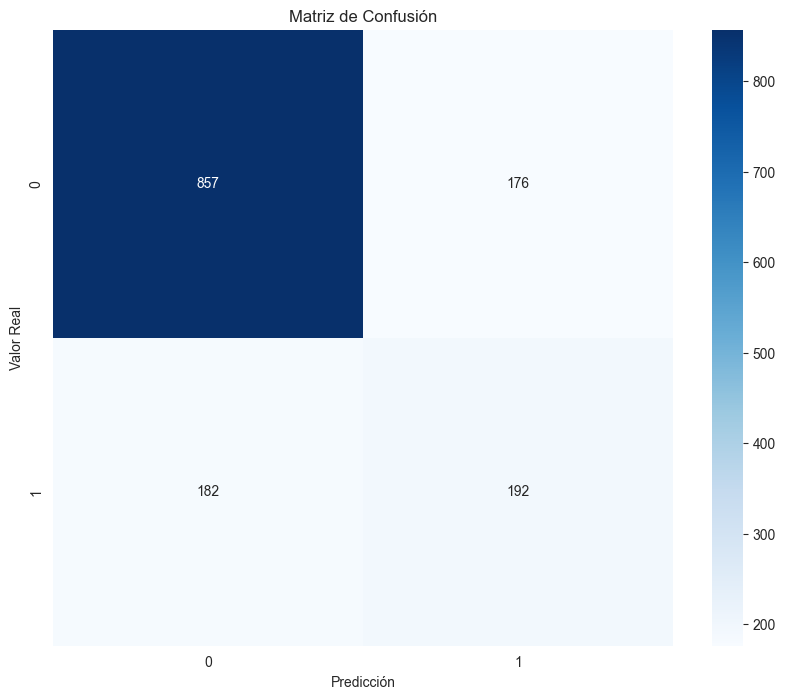

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.75      0.74      1407



In [131]:
def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en datos de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accurracy del modelo: {accuracy:.2f}")
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()
    
    # Mostrar el reporte de clasificación con métricas como precisión, recall y F1-score
    report = classification_report(y_test, y_pred)
    print(f"Reporte de Clasificación:")
    print(report)
    
# Utilizar la función para evaluar el modelo KNN con los mejores hiperparámetros
evaluate_model(best_knn, X_test, y_test)
    

Accurracy del modelo: 0.79


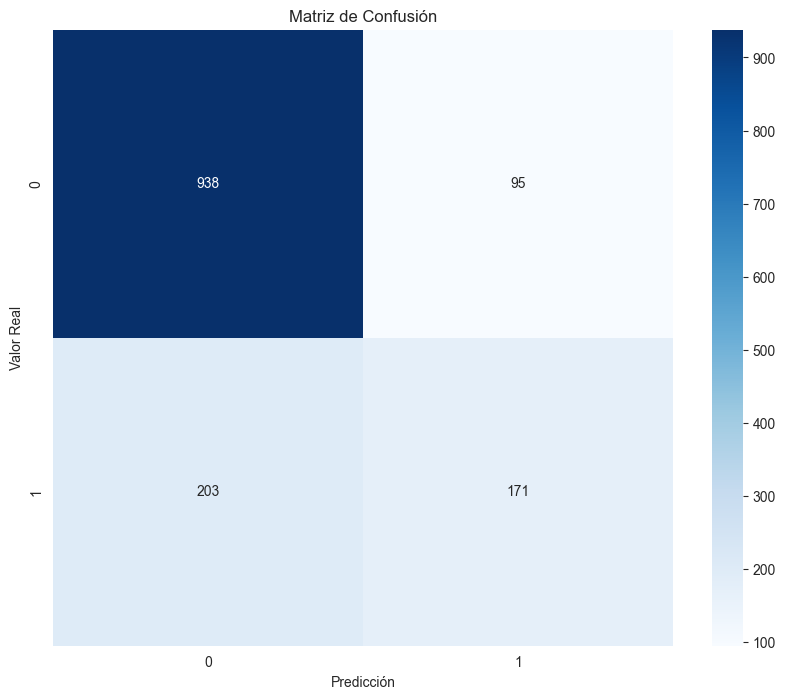

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [132]:
# Utilizar la función para evaluar el modelo árbol decisión con los mejores hiperparámetros
evaluate_model(best_tree, X_test, y_test)

Accurracy del modelo: 0.74


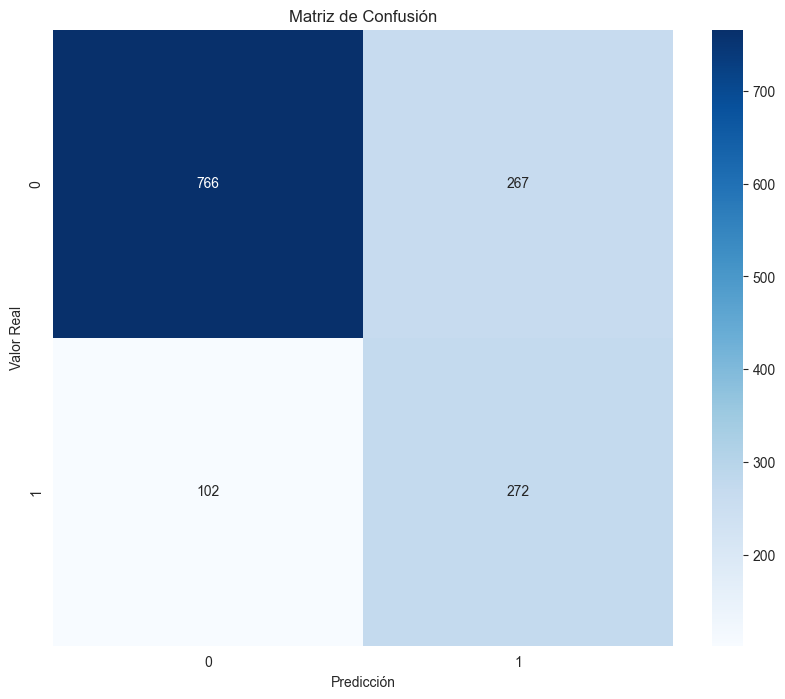

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [133]:
# Utilizar la función para evaluar el modelo Naive Bayes con los mejores hiperparámetros
evaluate_model(best_naive_bayes, X_test, y_test)